In [42]:
!pip install -U torch

Requirement already up-to-date: torch in /usr/local/lib/python3.7/dist-packages (1.8.1+cu101)


In [43]:
import pandas as pd
import numpy as np
import torch
import torchvision
import torch
from torchvision import transforms
from torchvision import datasets, models, transforms
import shutil
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from PIL import Image

from torchvision.transforms import ToTensor

In [44]:
transform = transforms.Compose([
    transforms.Resize([500,500]),
     transforms.ToTensor()
])

In [45]:
class Encoder(nn.Module):
  def __init__(self):
    super(Encoder,self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(3,16,3,padding=1,stride=2),  #batchsize x 16 x 250 x 250
        nn.ReLU()
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(16,32,3,padding=1,stride=2),  #batchsize x 32 x 125 x 125
        nn.ReLU()
    )
    self.layer3 = nn.Sequential(
        nn.Conv2d(32,64,3,padding=1,stride=2),   #batchsize x 64 x 63 x 63
        nn.ReLU()
    )

    self.layer4 = nn.Sequential(
        nn.Conv2d(64,128,3,padding=1,stride=2),   #batchsize x 128 x 32 x 32
        nn.ReLU()
    )

    self.layer5 = nn.Sequential(                  #batchsize x 256 x 26 x 26
        nn.Conv2d(128,256,7)
    )

  def forward(self,x):
    x = self.layer1(x)
    x = self.layer2(x)
    x = self.layer3(x)
    x = self.layer4(x)
    x = self.layer5(x)
    return x
    

In [46]:
class Decoder(nn.Module):
  def __init__(self):
    super(Decoder,self).__init__()

    self.layer1 = nn.Sequential(
        nn.ConvTranspose2d(256,128,7),                 # batchsize x 128 x 32 x 32
        nn.ReLU()
    )
    self.layer2 = nn.Sequential(
        
        nn.ConvTranspose2d(128,64,3,padding=1,stride=2),   # batchsize x 64 x 63 x 63
        nn.ReLU()

    )

    self.layer3 = nn.Sequential(
        
        nn.ConvTranspose2d(64,32,3,padding=1,stride=2),   # batchsize x 32 x 125 x 125
        nn.ReLU()

    )

    self.layer4 = nn.Sequential(
        
        nn.ConvTranspose2d(32,16,3,padding=1,stride=2,output_padding=1), # batchsize x 16 x 250 x 250
        nn.ReLU()
    )

    self.layer5 = nn.Sequential(
        nn.ConvTranspose2d(16,3,3,padding=1,stride=2,output_padding=1),  # batchsize x 3 x 500 x 500
    )

  def forward(self,x):
    #print("decode1: ",x.size())
    x = self.layer1(x)
    #print("decode2: ",x.size())
    x = self.layer2(x)
    #print("decode3: ",x.size())
    x = self.layer3(x)
    #print("decode4: ",x.size())
    x = self.layer4(x)
    #print("decode5: ",x.size())
    x = self.layer5(x)
    #print("decode6: ",x.size())
    return x



In [47]:
encoder = Encoder()
decoder = Decoder()

In [49]:
encoder.load_state_dict(torch.load("encoder_dict",map_location=torch.device('cpu')))
encoder.eval()
decoder.load_state_dict(torch.load("decoder_dict",map_location=torch.device('cpu')))
decoder.eval()

Decoder(
  (layer1): Sequential(
    (0): ConvTranspose2d(256, 128, kernel_size=(7, 7), stride=(1, 1))
    (1): ReLU()
  )
  (layer2): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
  )
  (layer3): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (1): ReLU()
  )
  (layer5): Sequential(
    (0): ConvTranspose2d(16, 3, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
  )
)

In [ ]:
import os

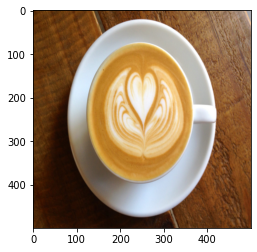

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


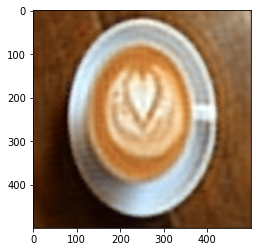

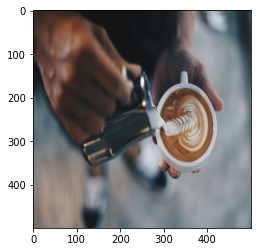

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


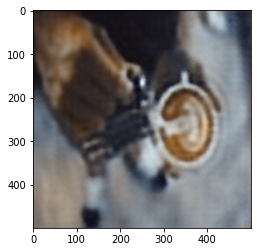

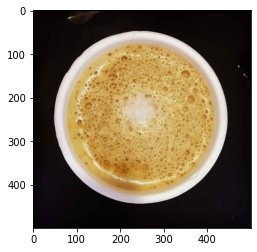

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


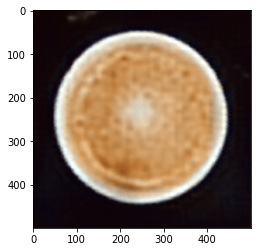

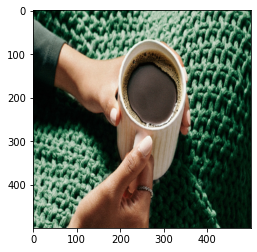

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


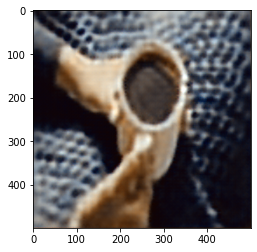

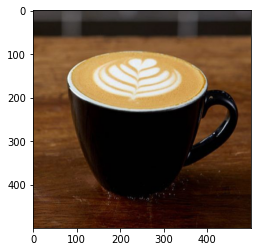

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


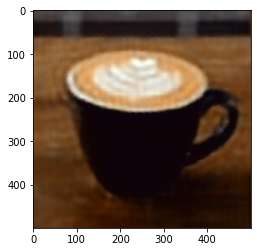

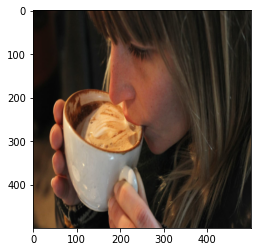

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


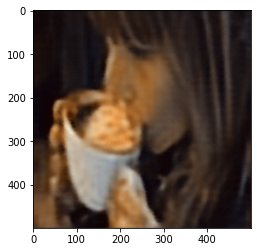

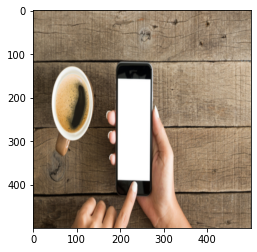

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


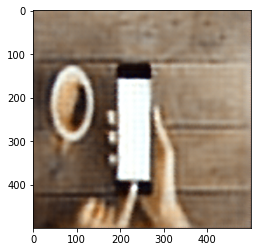

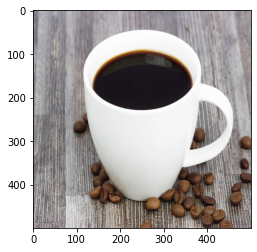

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


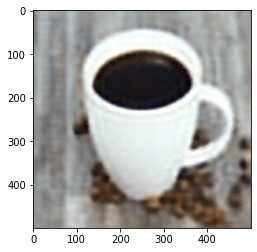

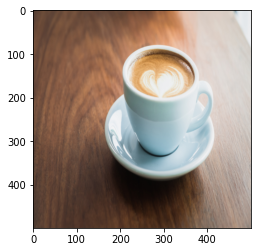

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


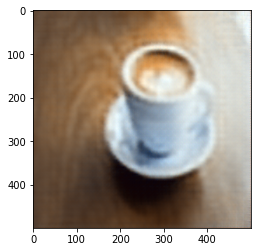

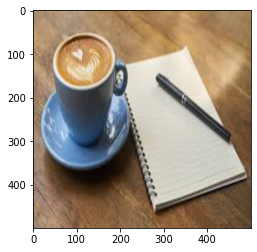

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


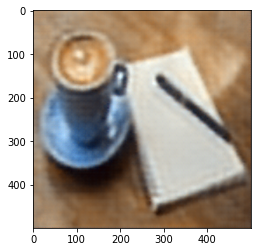

In [57]:
from PIL import Image
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

for i in os.listdir("./images"):
  image_original = Image.open("./images/"+i)
  image = transform(image_original)
  img = encoder(image.unsqueeze(0))
  out = decoder(img)
  plt.imshow(np.moveaxis(image.detach().numpy(),0,-1))
  plt.show()
  plt.imshow(np.moveaxis(out.detach().numpy()[0],0,-1))
  plt.show()

In [ ]:
image